#### Loading the Data <a class="anchor" id="Data"></a>


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#Load csv data
supply_data = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='latin-1')


In [42]:
pd.set_option('display.max_columns', None)
supply_data.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#### Data Information <a class="anchor" id="section1_1"></a>

Some immediate insights are:
* There are 53 columns and over 180,000 rows.
* Some columns have missing data, further inspection will assess validity.
* Some columns, not relevant to analysis, should be dropped before loading to power BI.


In [43]:
supply_data.columns


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [44]:
supply_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [45]:
supply_data.isnull().sum()


,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [46]:
print(supply_data.describe())


       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000 

#### Data Cleaning <a class="anchor" id="section2_1"></a>

Drop columns not relevant to analysis and initial visualizations to peer into characteristics of the dataset. For example:

* Outliers
* Distribution

In [49]:
#remove columns from dataframe
supply_data.drop(['Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Street', 'Customer Zipcode', 'Order Item Discount', 'Order Item Discount Rate', 'Product Image', 'Customer Password', 'Order Item Cardprod Id', 'Product Description'], axis=1, inplace=True)


In [50]:
supply_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [51]:
supply_data.columns


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

#### Big Picture <a class="anchor" id="section2_2">

In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution.

Next, correlations between all numerical variables are viewed using a heat matrix.

These are done to provide an initial insight to the data.

/tmp/ipython-input-62-1083509802.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  supply_data.hist(ax = ax);


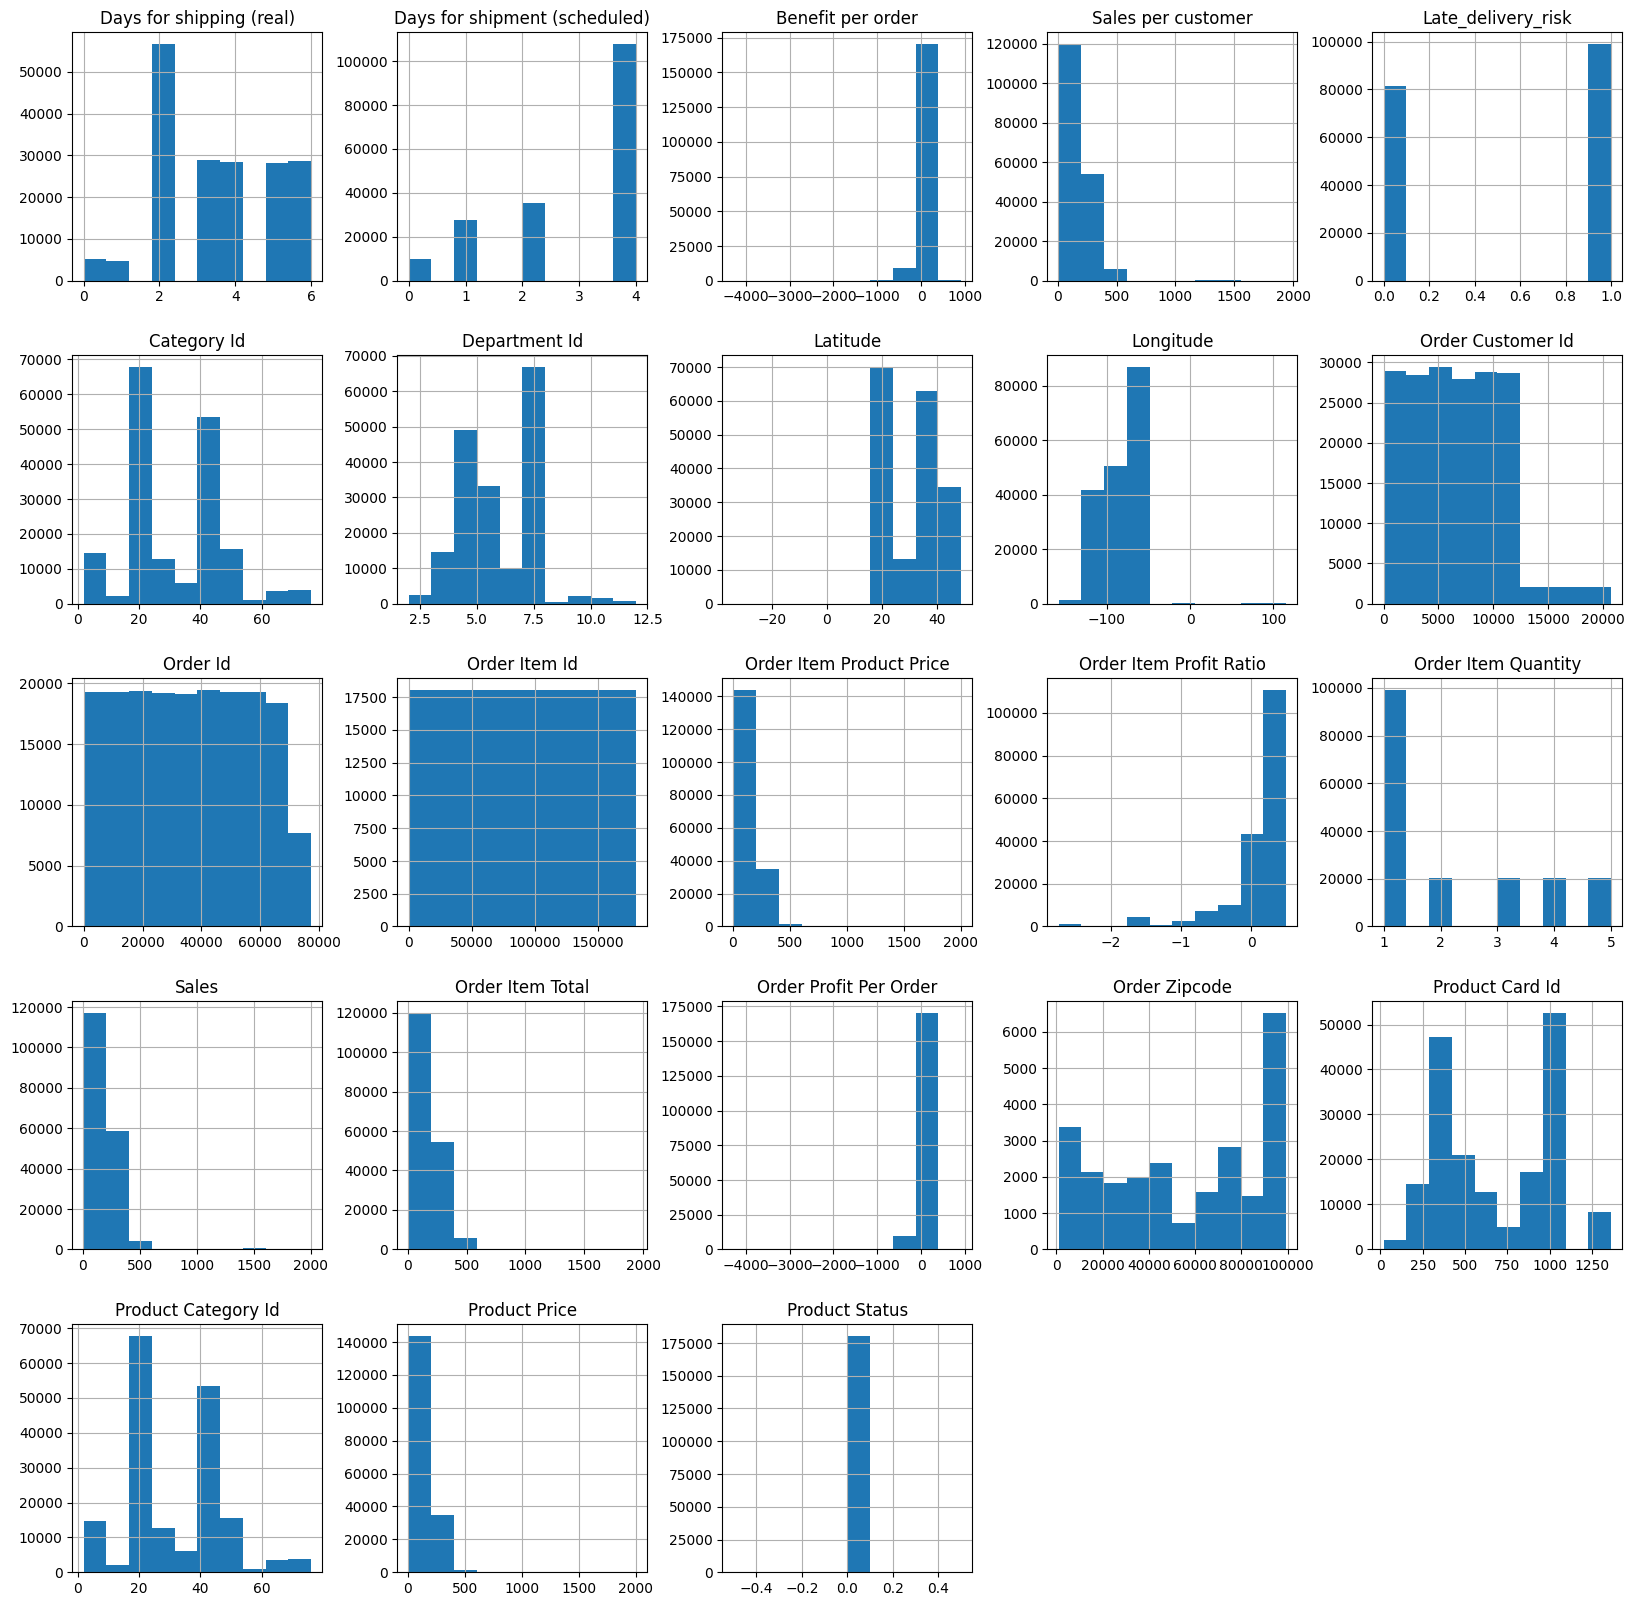

In [62]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
supply_data.hist(ax = ax);

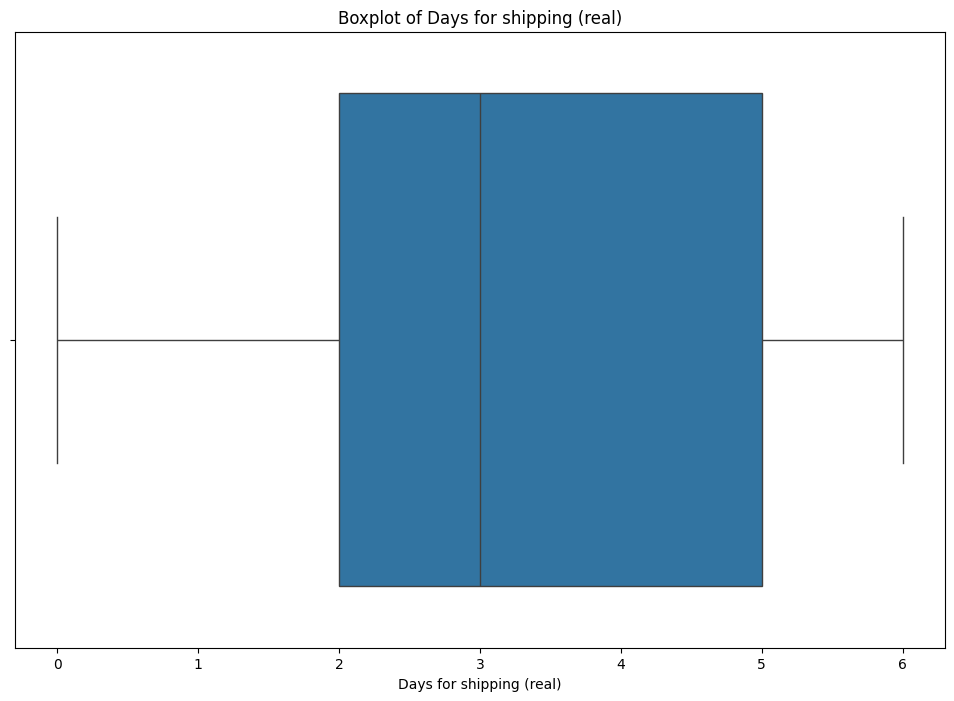

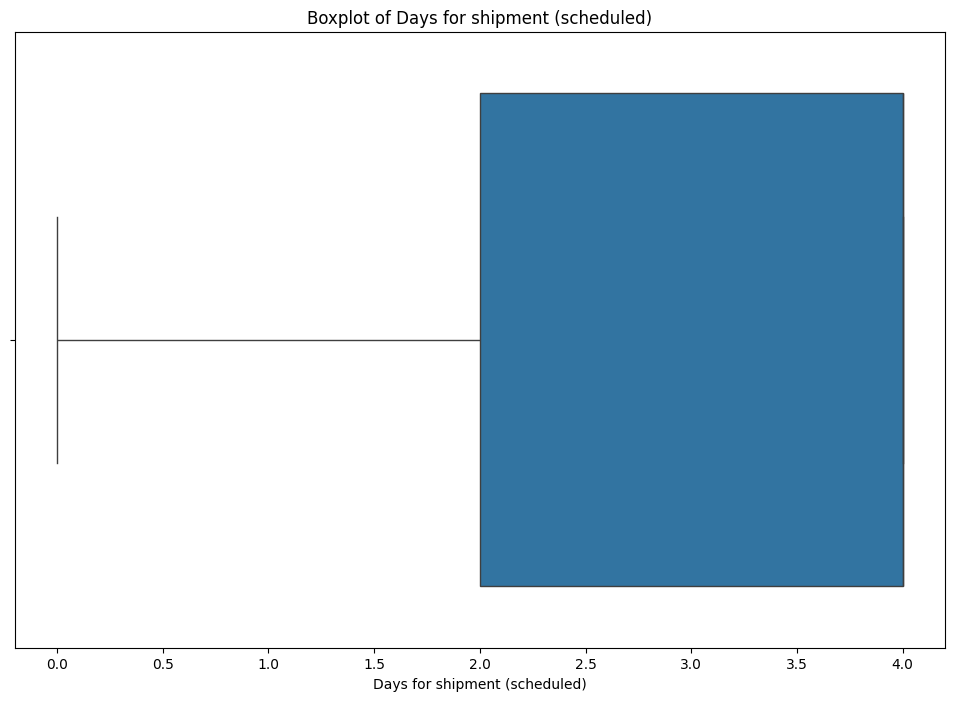

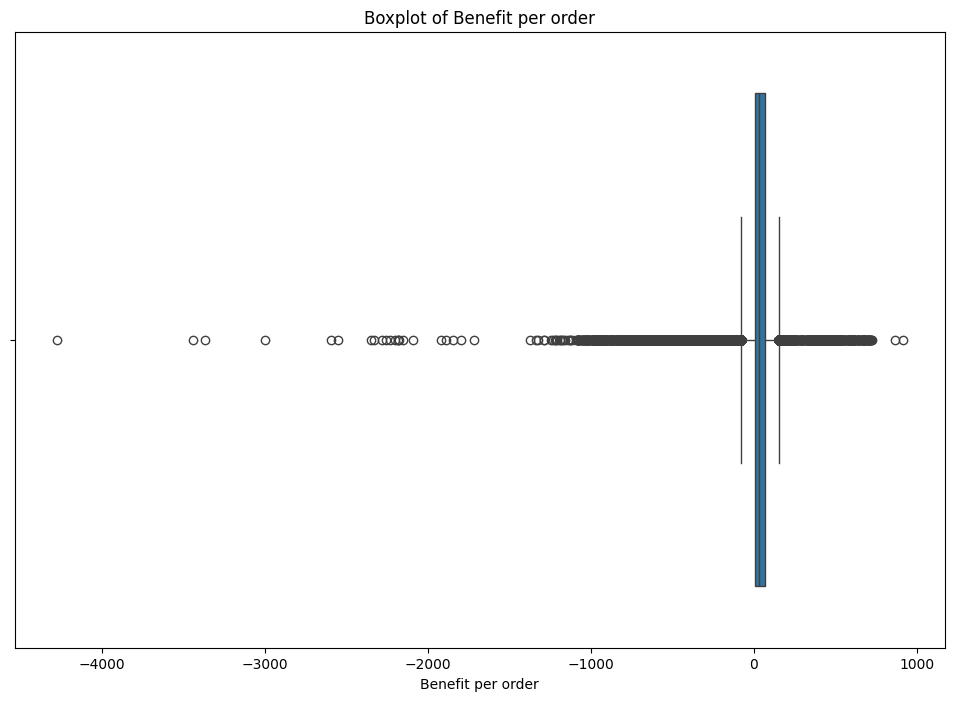

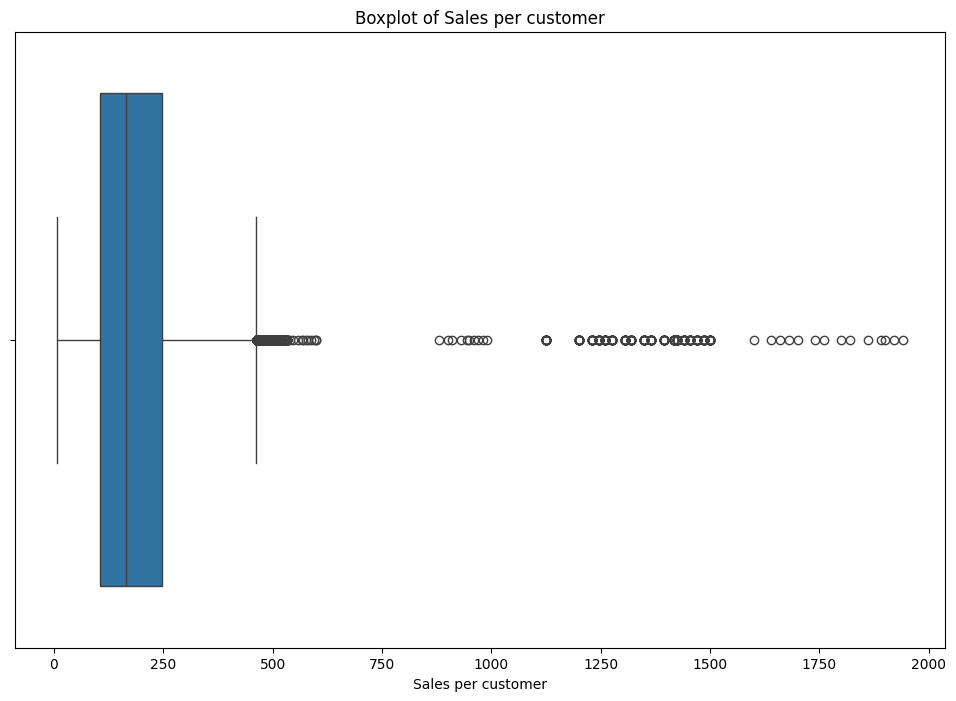

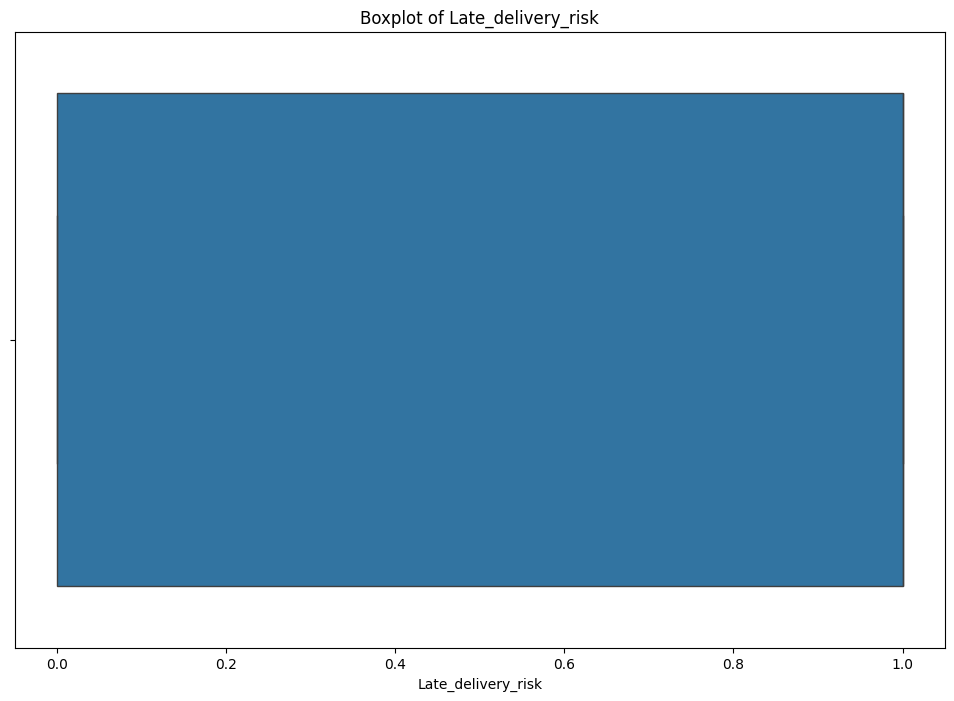

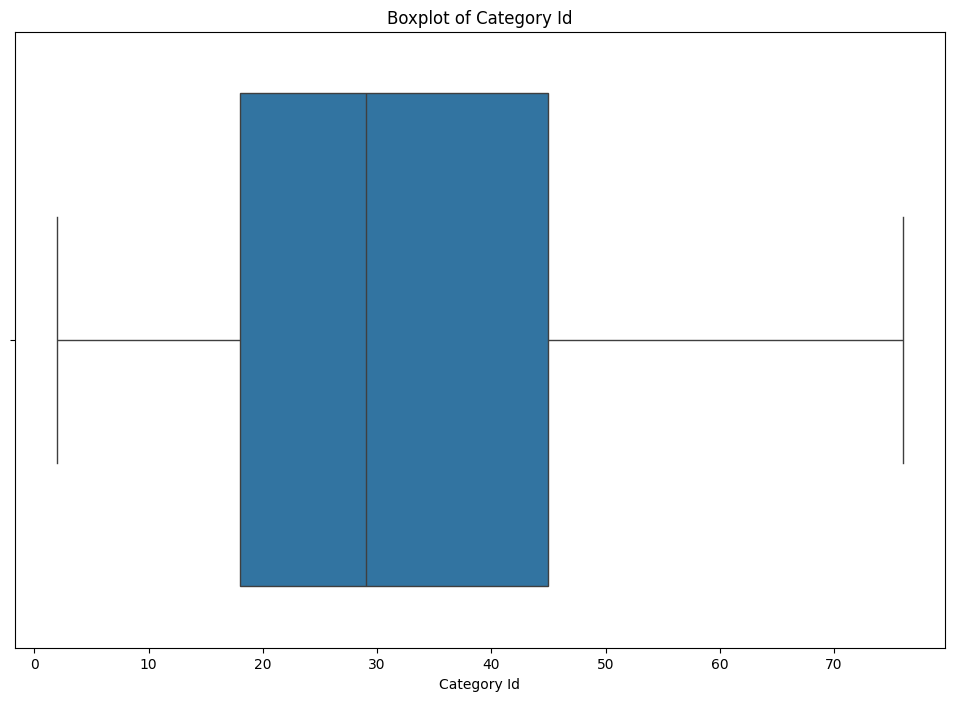

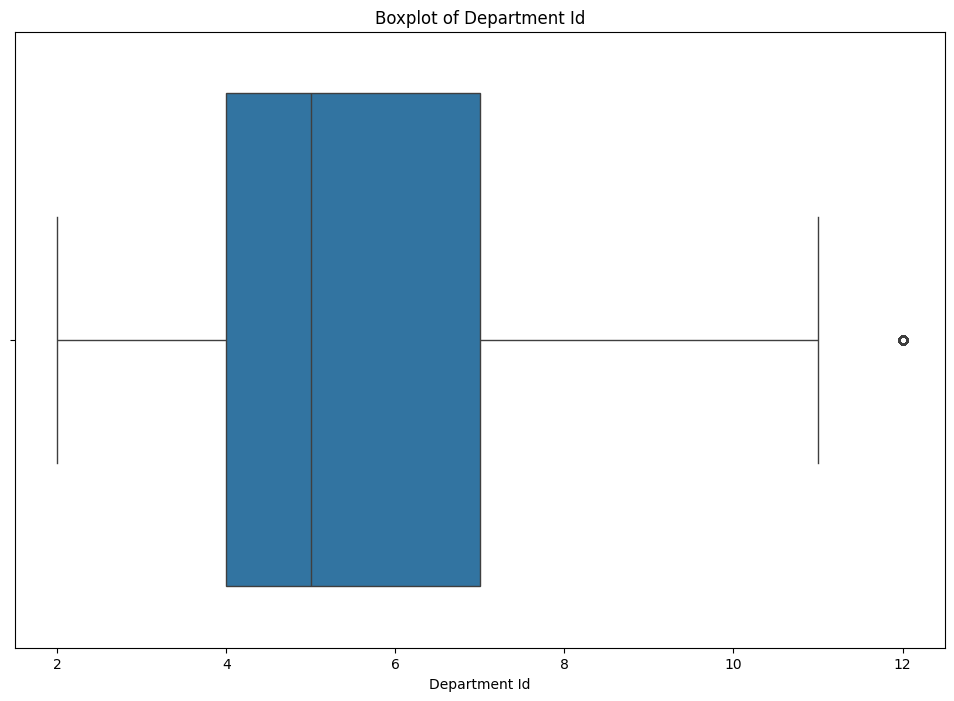

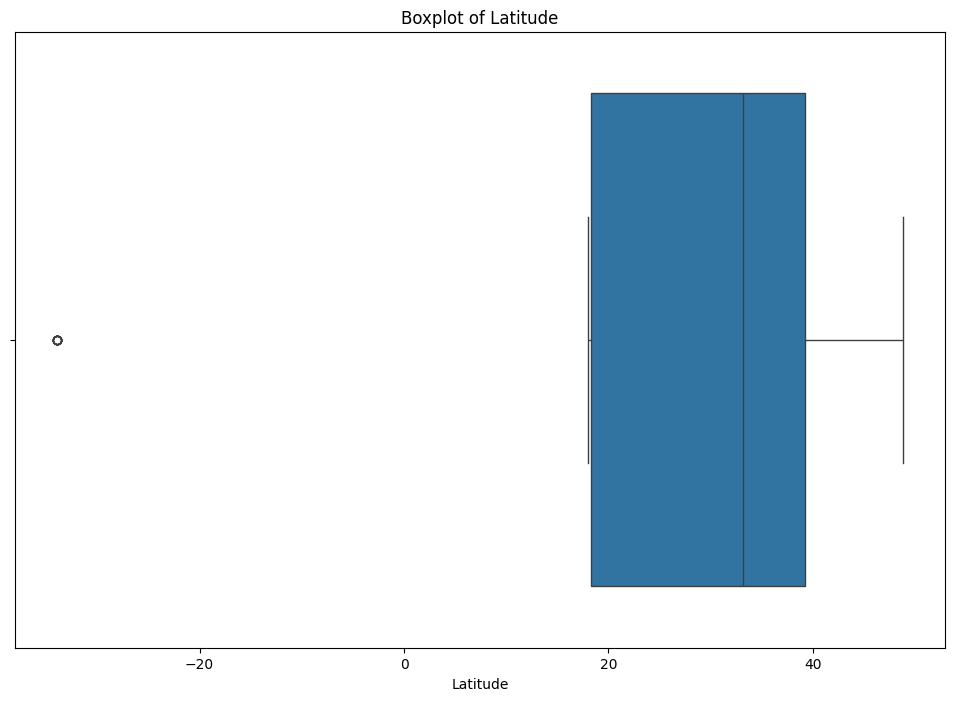

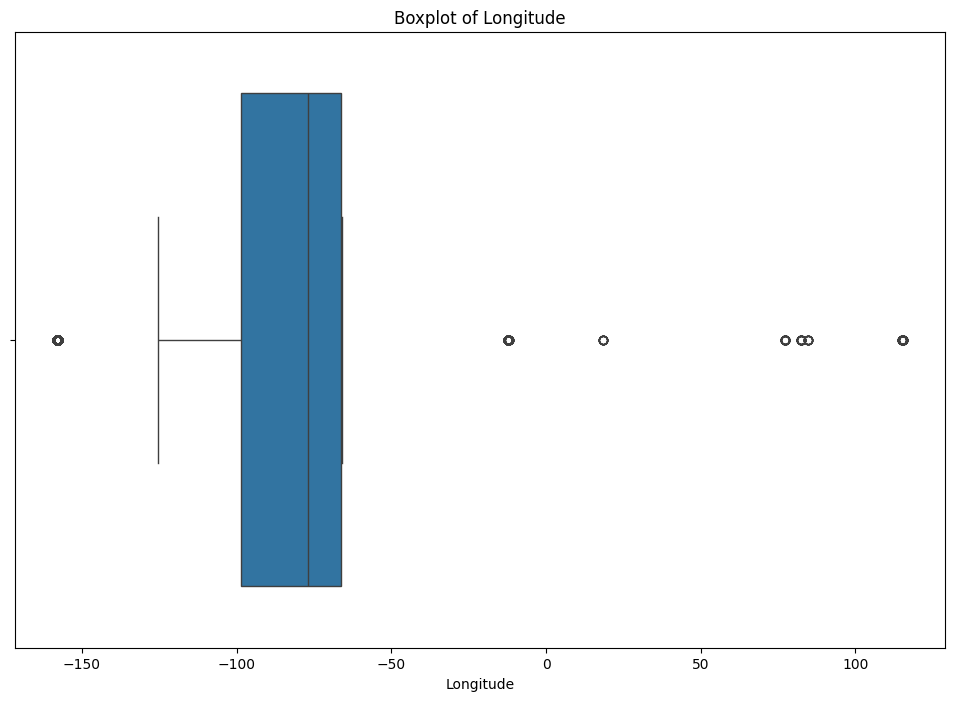

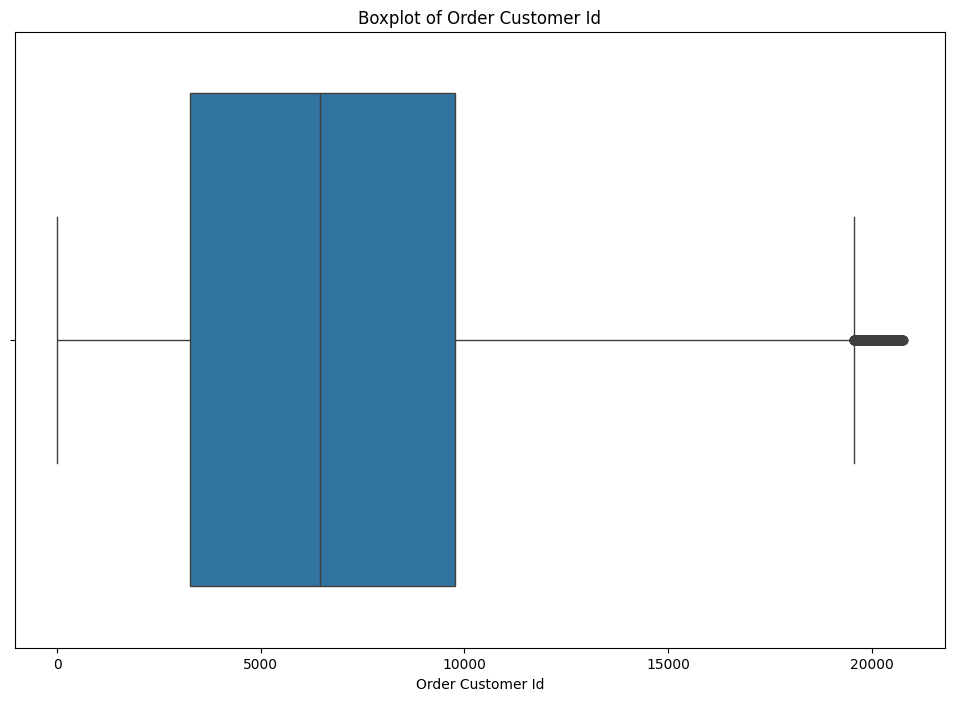

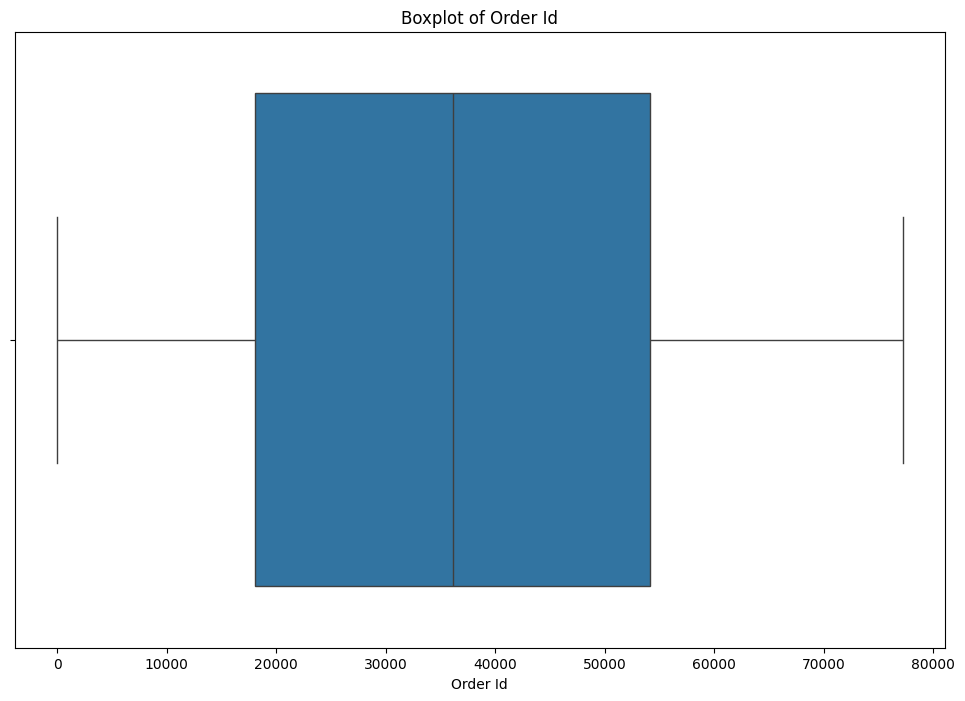

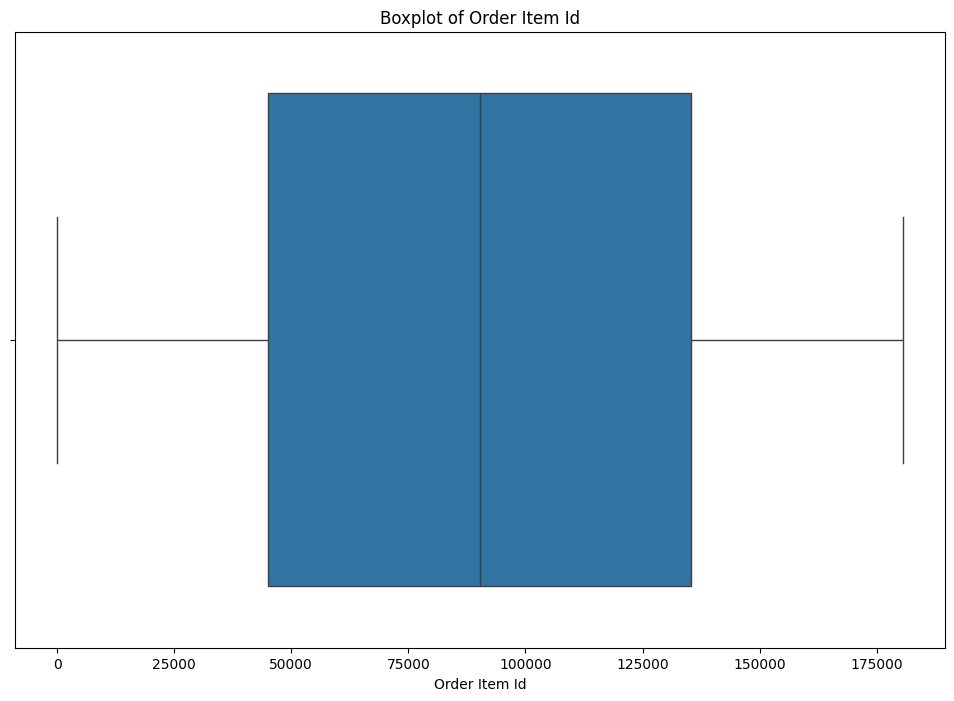

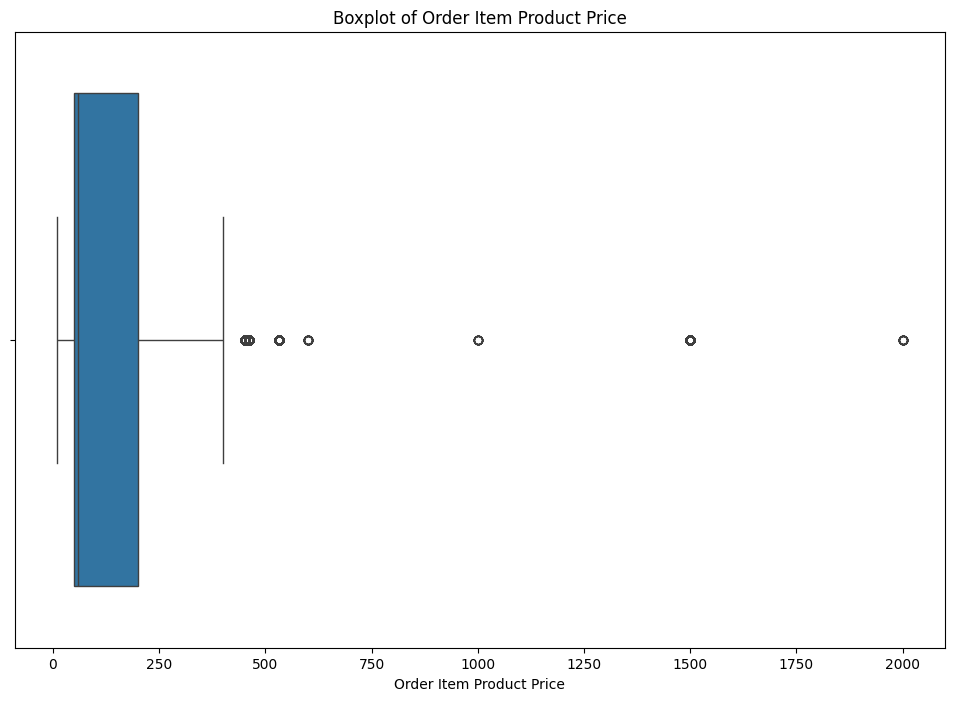

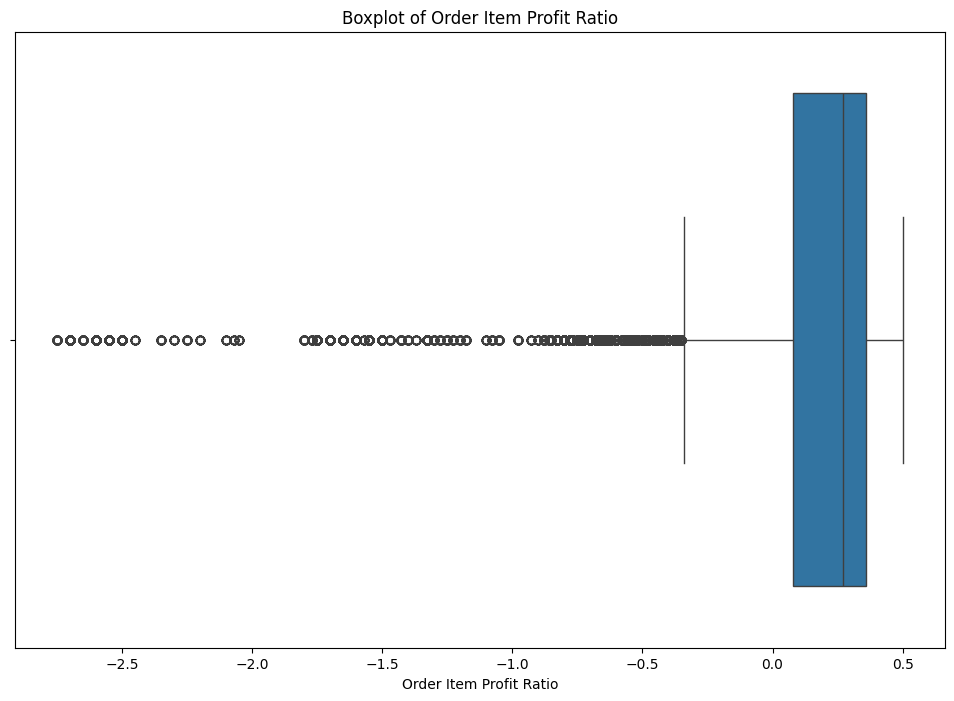

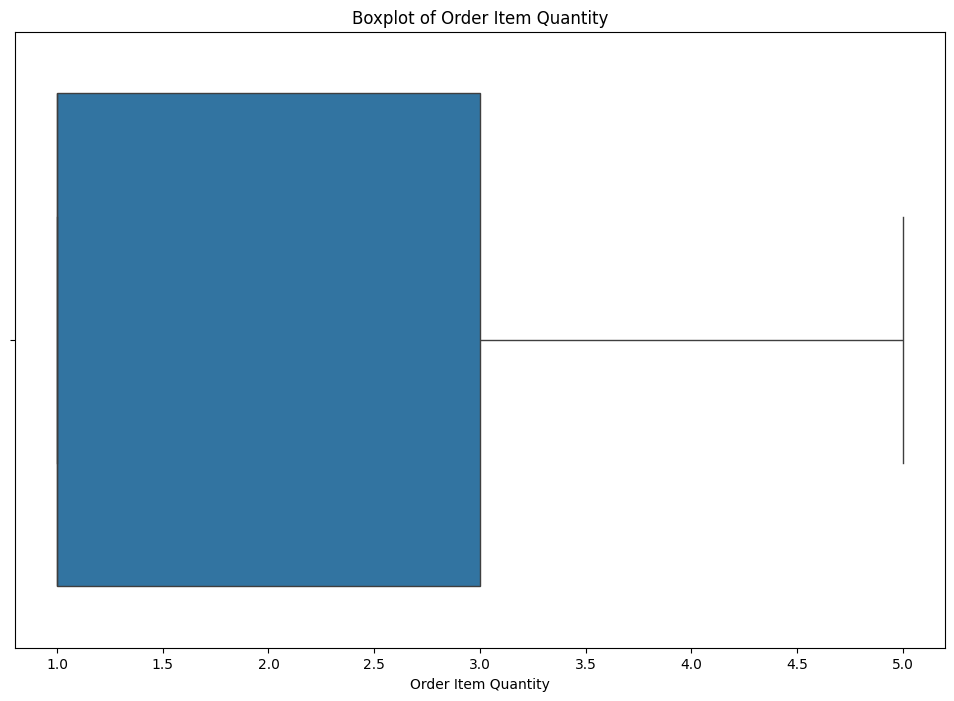

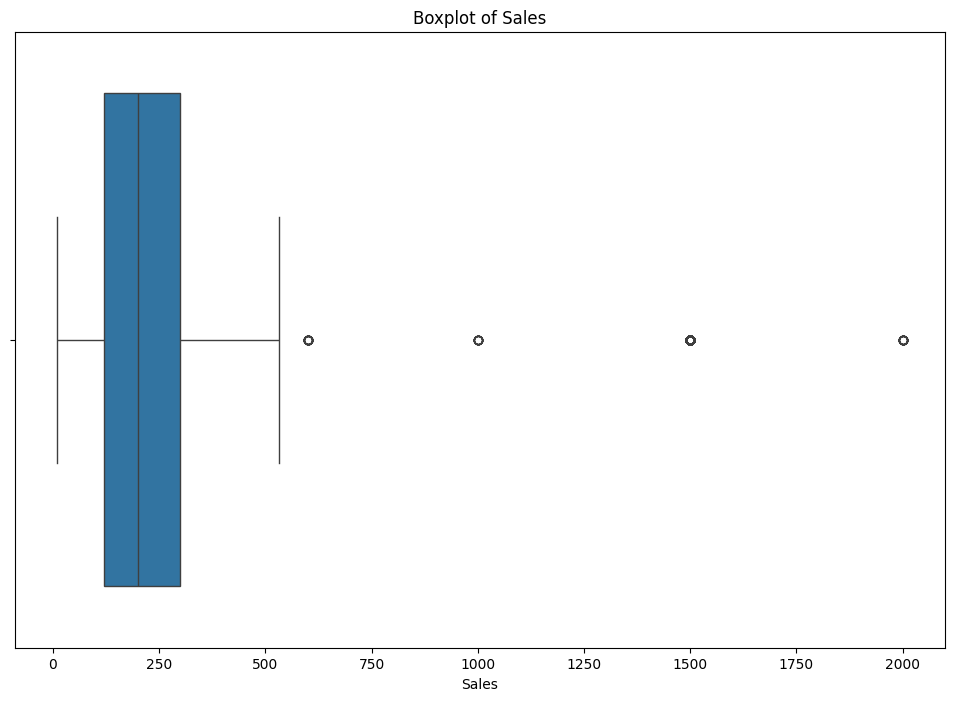

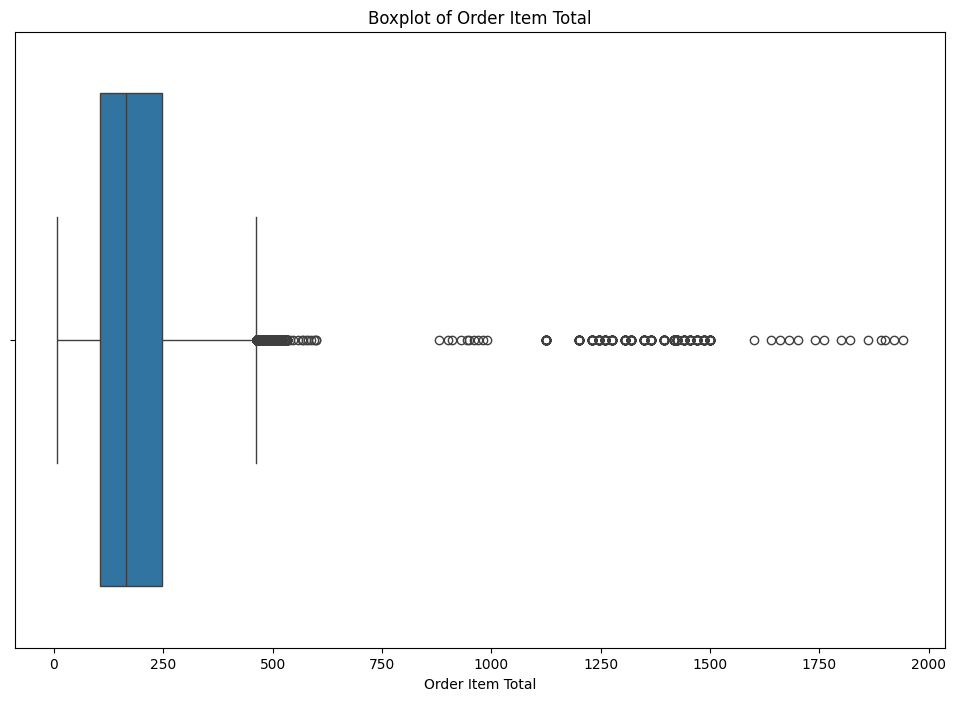

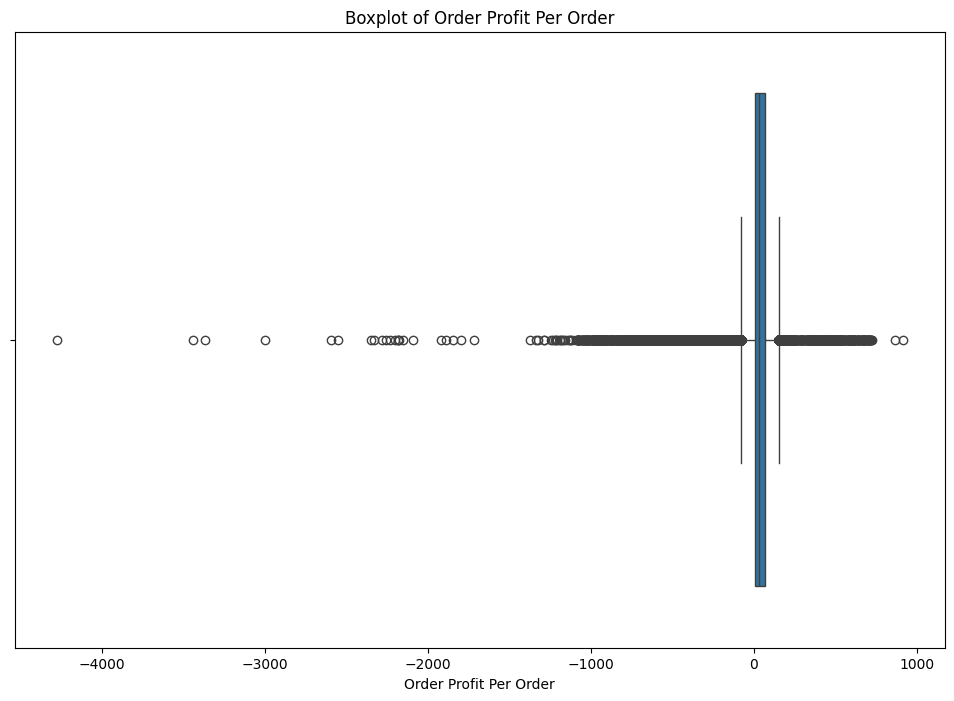

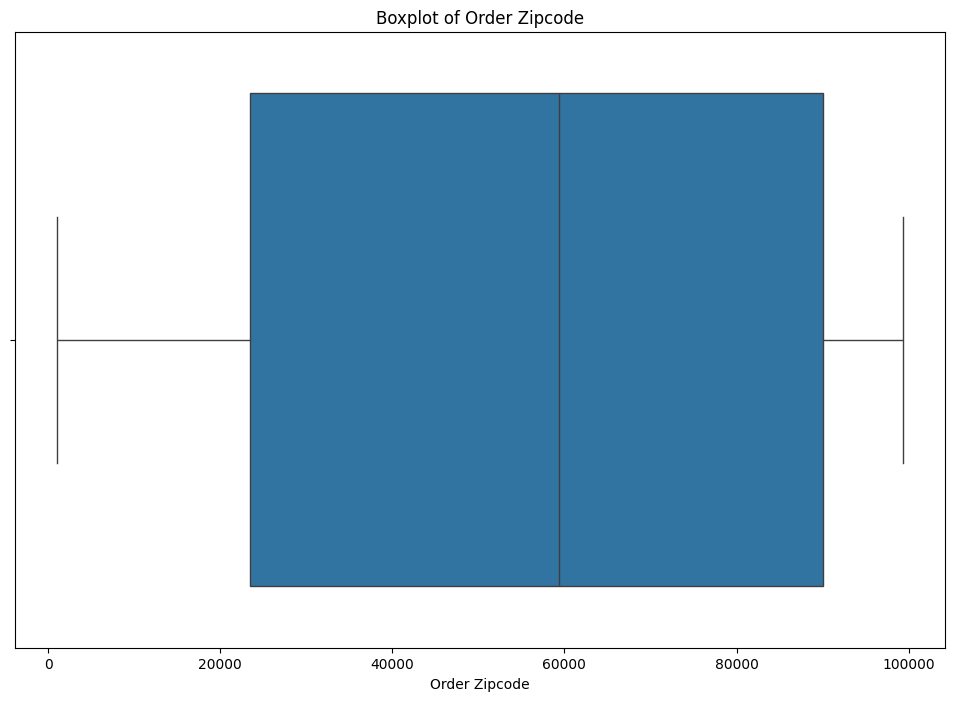

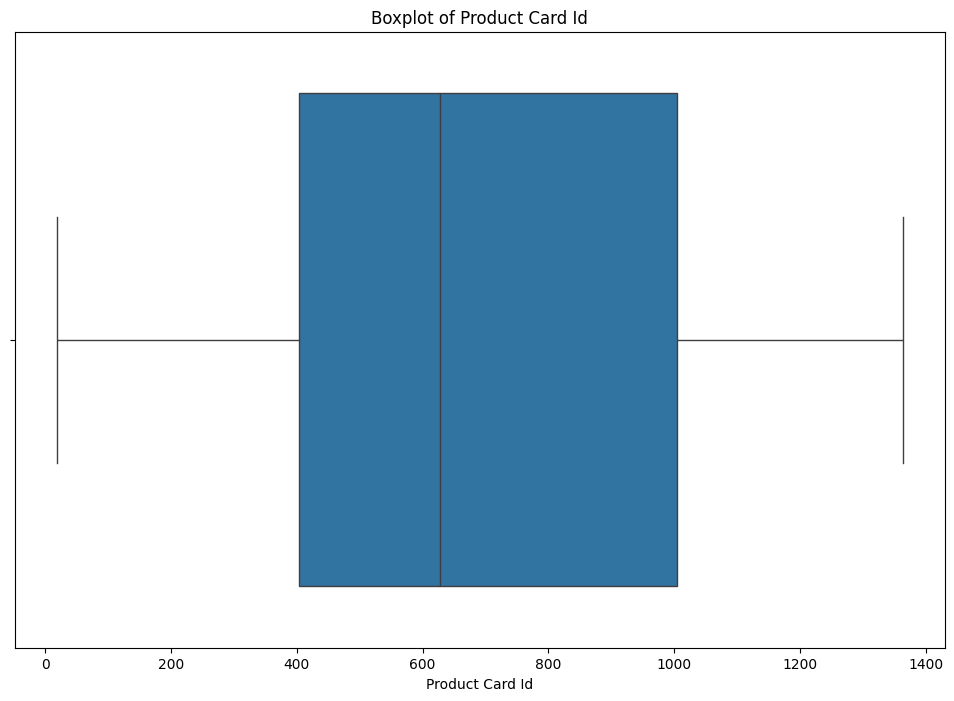

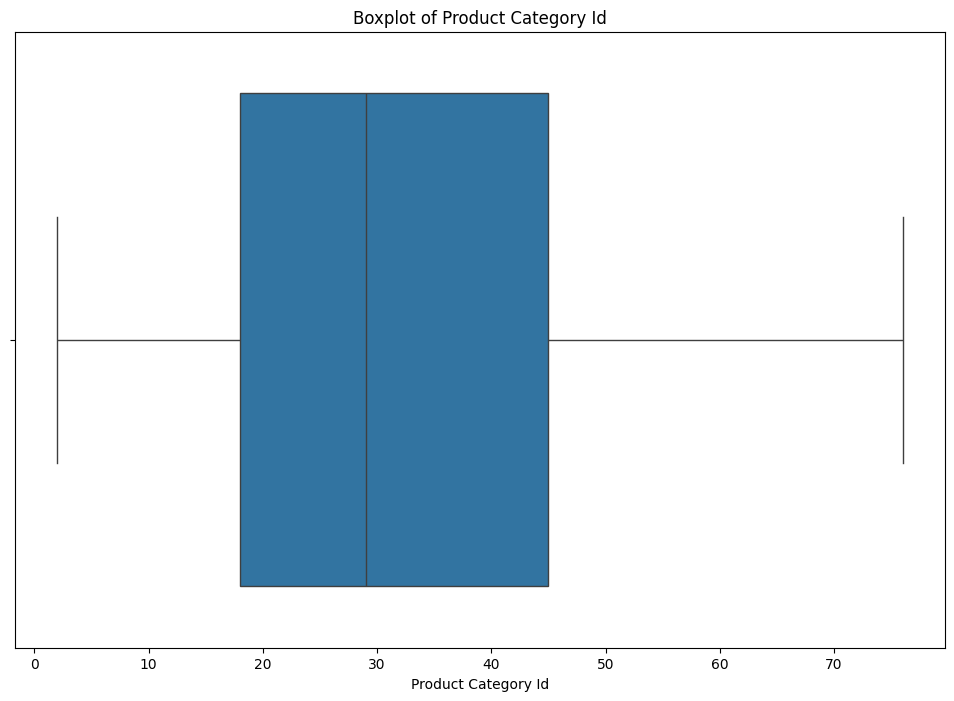

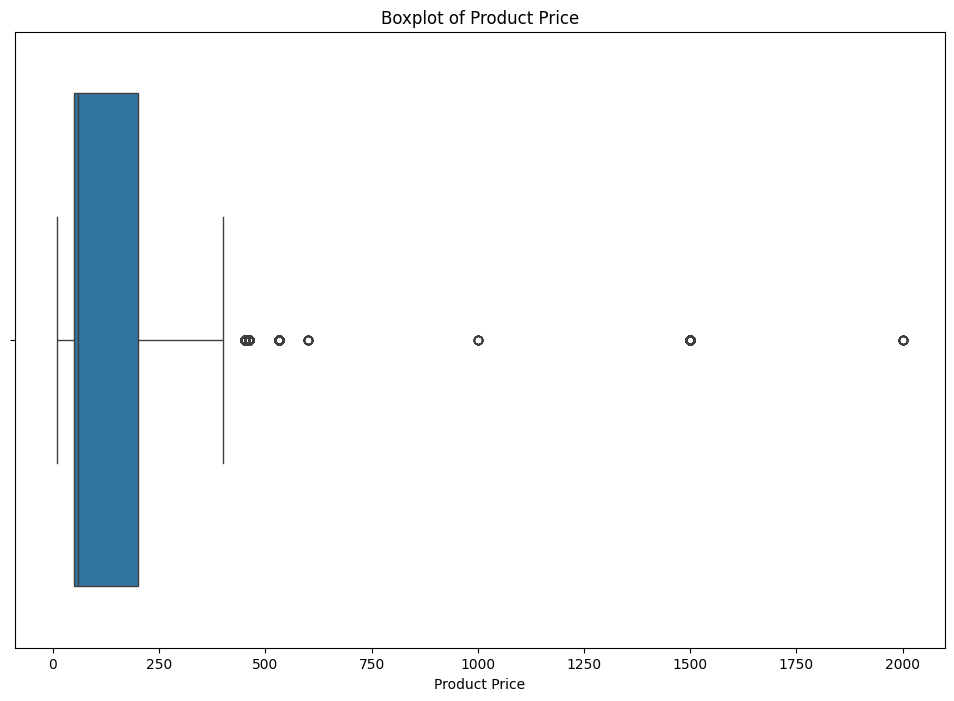

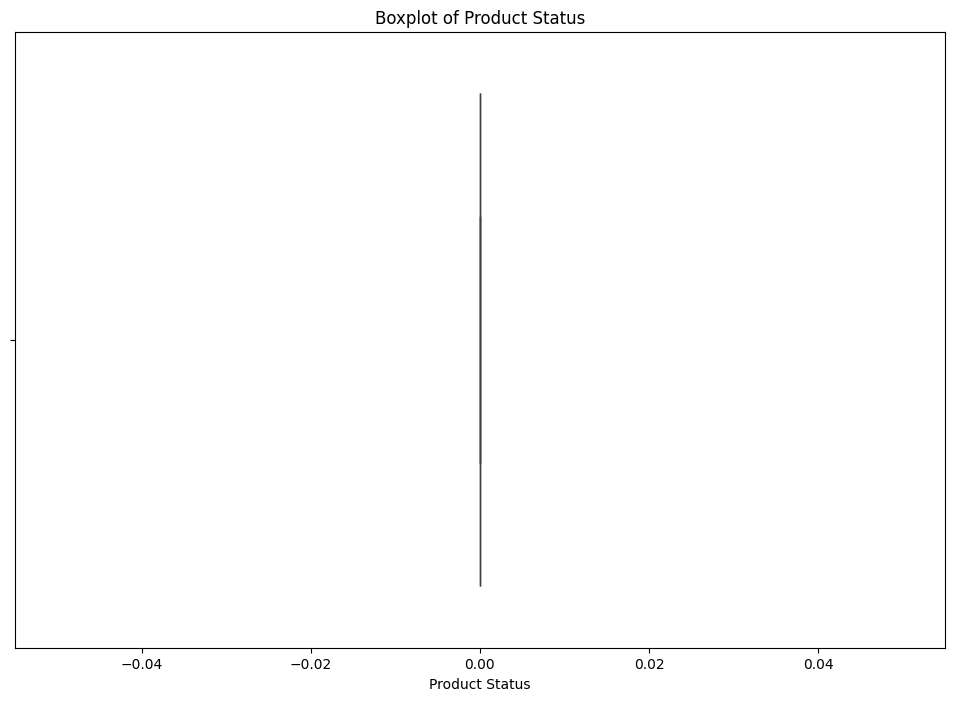

In [60]:
# Select only the numeric columns
numeric_cols = supply_data.select_dtypes(include=np.number).columns

# Create boxplots for all numeric columns
for col in numeric_cols:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=supply_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [64]:
# Select only the numeric columns
numeric_supply_data = supply_data.select_dtypes(include=np.number)

# Calculate the correlation matrix on the numeric columns
numeric_supply_data.corr()


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,-0.001631,-0.004073,0.003911,0.003432,-0.001711,-0.001769,0.002185,-0.004638,-0.000811,0.001962,0.001757,-0.005101,-0.000811,-0.000859,-0.000348,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,-0.000262,-0.005300,0.003675,0.000899,-0.001878,-0.001848,0.006912,-0.001822,-0.002925,0.006327,0.006445,-0.000185,0.005249,-0.000431,-0.000367,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.031442,0.000338,-0.002521,0.009354,0.013716,0.013556,0.103459,0.823689,0.015696,0.131816,0.133484,1.000000,-0.004978,0.033161,0.031889,0.103459,NaN
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.232367,-0.000223,0.001444,0.060181,0.079000,0.078176,0.781781,-0.001439,0.105413,0.989744,1.000000,0.133484,-0.000138,0.236367,0.225201,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001077,0.000679,-0.001915,0.001484,-0.001293,-0.001376,-0.002175,-0.002316,-0.000139,-0.003564,-0.003791,-0.003727,-0.014131,0.001490,0.001752,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.888835,0.002195,-0.002320,0.274633,0.198496,0.186796,0.461059,-0.001614,-0.302408,0.227483,0.225201,0.031889,-0.005943,0.991092,1.000000,0.461059,NaN
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,1.000000,0.002460,-0.002435,0.136897,0.106757,0.101676,0.446743,-0.003044,-0.265437,0.234718,0.232367,0.031442,-0.005982,0.906117,0.888835,0.446743,NaN
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002460,1.000000,-0.525122,0.002335,-0.002984,-0.003058,0.000471,-0.000081,-0.001853,-0.000696,-0.000223,0.000338,-0.002921,0.002031,0.002195,0.000471,NaN
Longitude,0.003911,0.003675,-0.002521,0.001444,-0.001915,-0.002320,-0.002435,-0.525122,1.000000,-0.005146,0.002540,0.002532,-0.000894,-0.003582,0.004467,0.001696,0.001444,-0.002521,-0.005880,-0.002580,-0.002320,-0.000894,NaN
Order Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,0.136897,0.002335,-0.005146,1.000000,0.204821,0.191814,0.111118,-0.000337,-0.091328,0.060961,0.060181,0.009354,-0.005659,0.228039,0.274633,0.111118,NaN


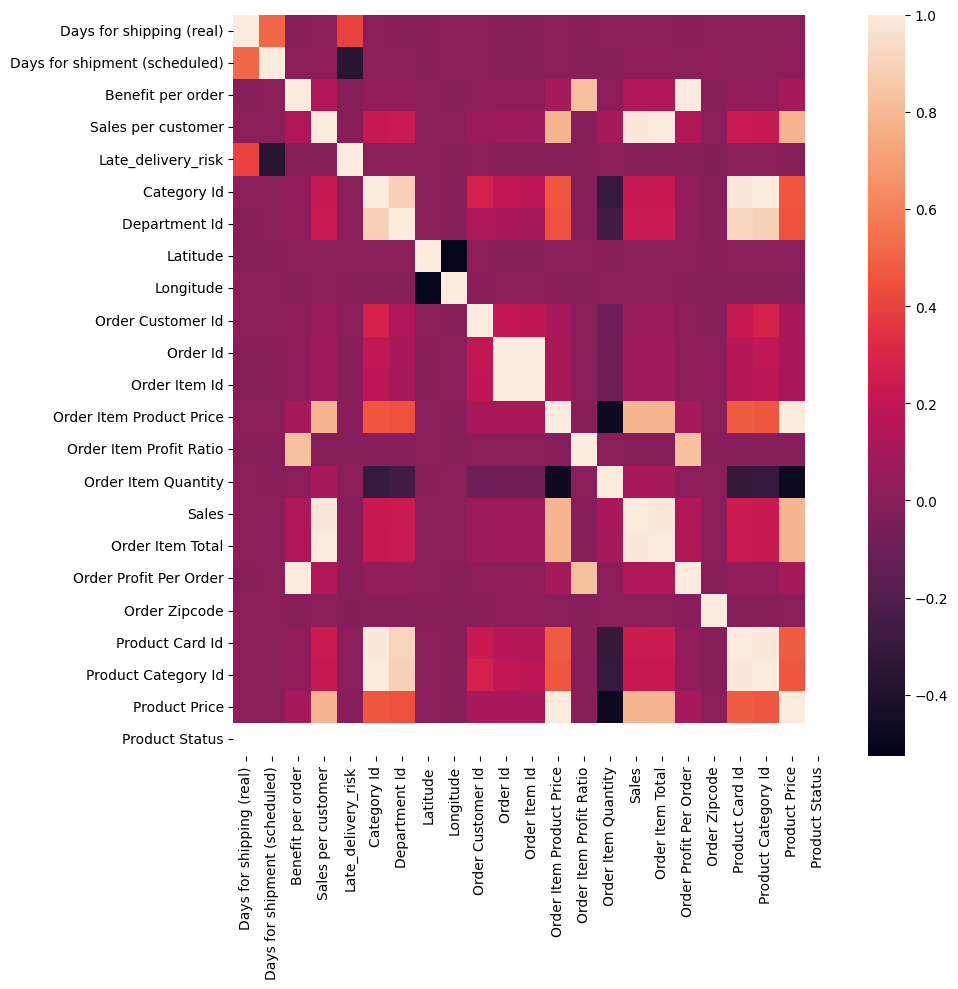

In [65]:
plt.figure(figsize=(10,10))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=numeric_supply_data.corr(),annot=False)
plt.tight_layout()
plt.show()

The table of correlations does not offer much help as there are too many numbers to read through. However, the heat map shows that `sales`, `price`, `order item total` may be the major drivers to focus on in the data.